<img src="https://i.imgur.com/jDiLGFC.jpg">
You are given the following <a href="https://raw.githubusercontent.com/erood/interviewqs.com_code_snippets/master/Datasets/ddi_baby_names.csv">dataset</a>, containing information on baby names from the <a href="https://www.ssa.gov/oact/babynames/">U.S. Social Security Administration</a>.

Using the dataset, write code to find the following:

- Number of unique names across the dataset, split by both # of unique male/female names
- Top 10 most popular male and female names, along with their associated counts
- The top 10 most trending names (% growth) from 2010+, with an associated plot to show the relative growth between names
<br>

In [2]:
# Here is code to pull the dataset and relevant libraries 
# into a Google Colab or Jupyter notebook to help get you started
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
baby_names = pd.read_csv("https://raw.githubusercontent.com/erood/interviewqs.com_code_snippets/master/Datasets/ddi_baby_names.csv")
baby_names.head()

,year,name,gender,count
0,1880,Mary,F,7065
1,1880,Anna,F,2604
2,1880,Emma,F,2003
3,1880,Elizabeth,F,1939
4,1880,Minnie,F,1746


## Number of unique names across the dataset, split by both # of unique male/female names

In [19]:
# Number of unique male names
len(baby_names['name'].where(baby_names['gender'].str.contains('M')).dropna().unique())

41475

In [32]:
# Number of unique female names
len(baby_names['name'].where(baby_names['gender'].str.contains('F')).dropna().unique())

67698

## Top 10 most popular male and female names, along with their associated counts


In [34]:
# Initial attempt. Note that there are many of the same name but the year is different
# I assume that I'm counting overall popularity since year was not specified in prompt
baby_names.sort_values(by='count', ascending = False).where(baby_names['gender'].str.contains('M')).dropna().head(10)

,year,name,gender,count
437169,1947.0,James,M,94757.0
544630,1957.0,Michael,M,92704.0
437170,1947.0,Robert,M,91640.0
533165,1956.0,Michael,M,90656.0
556204,1958.0,Michael,M,90517.0
447478,1948.0,James,M,88584.0
510812,1954.0,Michael,M,88528.0
521887,1955.0,Michael,M,88327.0
437171,1947.0,John,M,88319.0
427047,1946.0,James,M,87436.0


In [66]:
# Making new dataframe consisting of most popular names regardless of year
# Top 10 most popular male names overall
male_names = baby_names.where(baby_names['gender'].str.contains('M'))
male_names.groupby(['name', 'gender']).agg({'count': 'sum'}).sort_values(by='count',ascending = False).head(10)

,,count
name,gender,
James,M,5164280.0
John,M,5124817.0
Robert,M,4820129.0
Michael,M,4362731.0
William,M,4117369.0
David,M,3621322.0
Joseph,M,2613304.0
Richard,M,2565301.0
Charles,M,2392779.0


In [67]:
# Top 10 most popular female names overall
female_names = baby_names.where(baby_names['gender'].str.contains('F'))
female_names.groupby(['name', 'gender']).agg({'count': 'sum'}).sort_values(by='count',ascending = False).head(10)

,,count
name,gender,
Mary,F,4125675.0
Elizabeth,F,1638349.0
Patricia,F,1572016.0
Jennifer,F,1467207.0
Linda,F,1452668.0
Barbara,F,1434397.0
Margaret,F,1248985.0
Susan,F,1121703.0
Dorothy,F,1107635.0


## The top 10 most trending names (% growth) from 2010+, with an associated plot to show the relative growth between names

In [68]:
# Checking type of year column to see if I have to convert baby names to int. Not needed
type(baby_names['year'][0])

numpy.int64

In [73]:
# Dropping all entries before 2010
df_after_2010 = baby_names[baby_names['year'] >= 2010]
df_after_2010

,year,name,gender,count
1658039,2010,Isabella,F,22913
1658040,2010,Sophia,F,20643
1658041,2010,Emma,F,17345
1658042,2010,Olivia,F,17028
1658043,2010,Ava,F,15433
...,...,...,...,...
1957041,2018,Zylas,M,5
1957042,2018,Zyran,M,5
1957043,2018,Zyrie,M,5
1957044,2018,Zyron,M,5


In [78]:
# Sanity check
min(df_after_2010['year'])

2010

In [85]:
# I assume that this is asking to track the progress of the 10 most popular names in 2010 through to end year of dataset (2018)
# Finding top 10 names in 2010
df_after_2010.loc[df_after_2010['year'] == 2010].sort_values(by = 'count', ascending = False).head(10)


,year,name,gender,count
1658039,2010,Isabella,F,22913
1677854,2010,Jacob,M,22127
1658040,2010,Sophia,F,20643
1677855,2010,Ethan,M,18002
1677856,2010,Michael,M,17350
1658041,2010,Emma,F,17345
1677857,2010,Jayden,M,17179
1677858,2010,William,M,17051
1658042,2010,Olivia,F,17028
1677859,2010,Alexander,M,16756


In [91]:
tracked_names = ['Isabella', 'Jacob', 'Sophia', 'Ethan', 'Michael', 'Emma', 'Jayden', 'William', 'Olivia', 'Alexander']


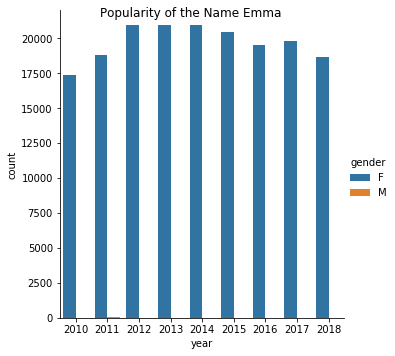

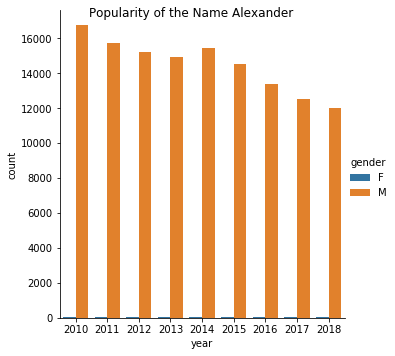

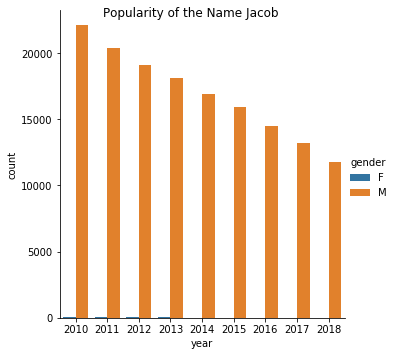

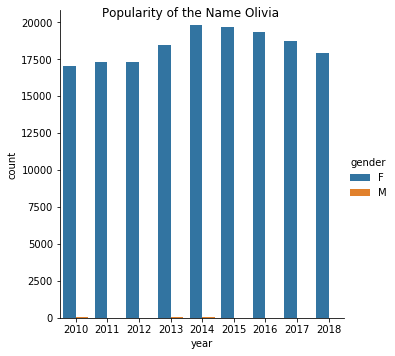

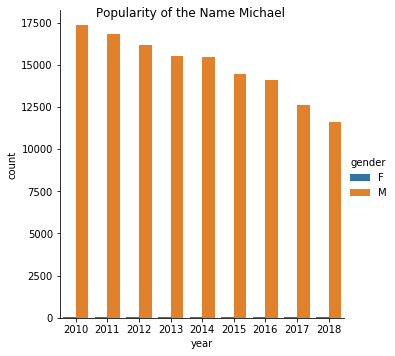

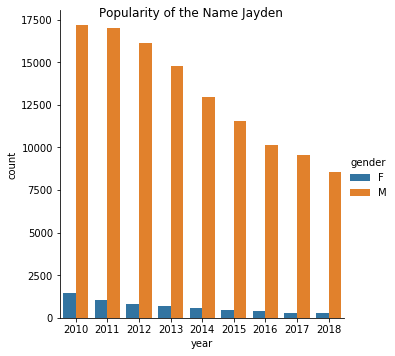

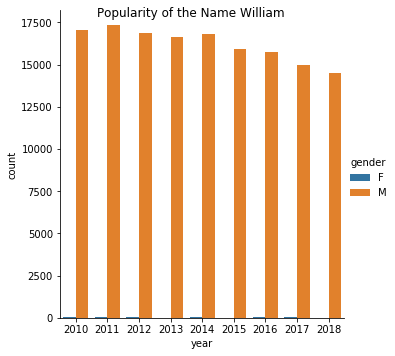

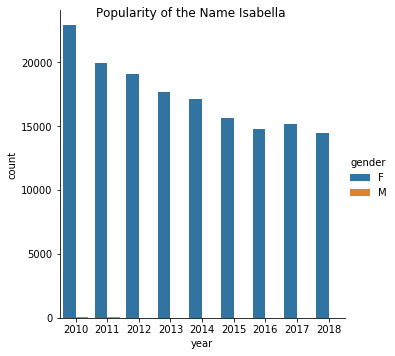

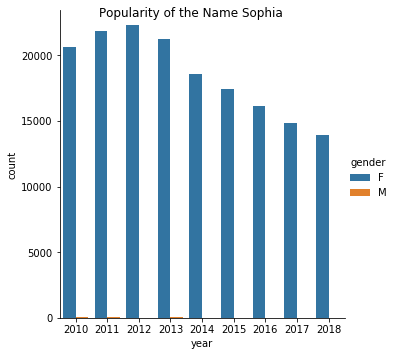

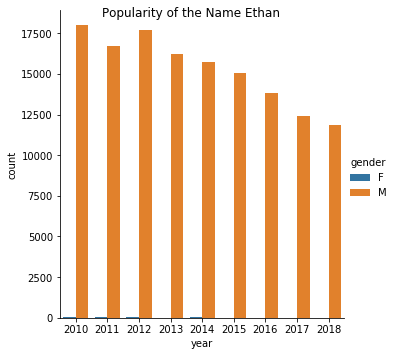

In [166]:
# NOTE I separated gender because there were instances of males/females in each name despite the name being predominantly correlated with one gender. Possible data entry error?
def plot_popular_names_over_time(name):
    sorted_df = df_after_2010.loc[df_after_2010['name'] == name].sort_values(by = 'year') # Creates a new df containing only one name over time
    sns.catplot(x='year', y='count', hue='gender', data=sorted_df, kind='bar').fig.suptitle('Popularity of the Name {}'.format(name)) # Creates end graph

for name in tracked_names:
    plot_popular_names_over_time(name)